In [1]:
from sympy import *  
init_printing()  
import matplotlib.pyplot as plt
import numpy as np
from dtumathtools import *
from sympy.physics.units import *

In [2]:
# Task 4

#Earth Data
mu_earth = 1.75*10**-5 # newton *second / meter**2
rho_earth = 1.225 # kilogram / meter**3
#Mars conditions 2 Data
mu_mars = 1.130*10**-5 # newton *second / meter**2
rho_mars = 0.017 # kilogram / meter**3

relation = (rho_mars/mu_mars)/(rho_earth/mu_earth) 
display("Relation between Mars and Earth", relation)


# We now want to calculate the reynolds number at r=0.75R of the blade.
c = 0.14 * meter
R = 1.22 * meter
rpm = 1377 /second
# We need to convert the rpm to rad/s



omega = rpm * 2 * np.pi /(60)
display("Angular velocity (rad/s)", omega)

# We need to calculate the velocity at r=0.75R
r = 0.75 * R
v = r * omega
display("Velocity at r=0.75R", v)


# Calculate reynolds number
Re = rho_mars * v * c / mu_mars
display("Reynolds number", convert_to(Re,1))

'Relation between Mars and Earth'

'Angular velocity (rad/s)'

'Velocity at r=0.75R'

'Reynolds number'

In [3]:
import os

folder_path = 'Foils/'
results = {}

for file_name in os.listdir(os.path.join(folder_path, 'Results/')):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, 'Results/', file_name)
        data = np.loadtxt(file_path, skiprows=12)
        alpha = data[:, 0]   # Angle of attack
        cl = data[:, 1]      # Lift coefficient
        cd = data[:, 2]      # Drag coefficient
        cdp = data[:, 3]     # Pressure drag coefficient
        cm = data[:, 4]      # Moment coefficient
        top_xtr = data[:, 5] # Top surface transition location
        bot_xtr = data[:, 6] # Bottom surface transition location

        # Save the data in a dictionary linked to the filename
        results[file_name.split('.')[0]] = {
            'alpha': alpha,
            'cl': cl,
            'cd': cd,
            'cdp': cdp,
            'cm': cm,
            'top_xtr': top_xtr,
            'bot_xtr': bot_xtr
        }

        print(f"Processed and saved data for file: {file_name}")
        
        




Processed and saved data for file: Ishii_xtr01.csv
Processed and saved data for file: E61.csv
Processed and saved data for file: AG12_xtr01.csv
Processed and saved data for file: S1223_xtr01.csv
Processed and saved data for file: SD7003_xtr01.csv
Processed and saved data for file: S1223.csv
Processed and saved data for file: SD7003.csv
Processed and saved data for file: E61_xtr01.csv
Processed and saved data for file: Ishii.csv
Processed and saved data for file: S1091_xtr01.csv
Processed and saved data for file: S1091.csv
Processed and saved data for file: AG12.csv


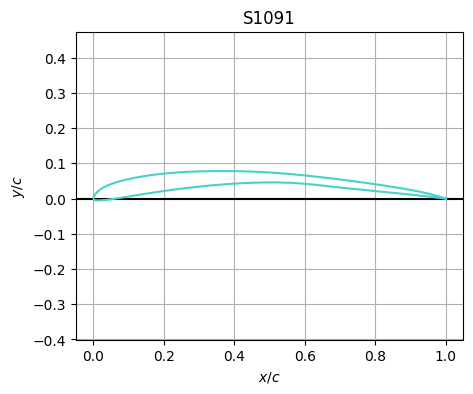

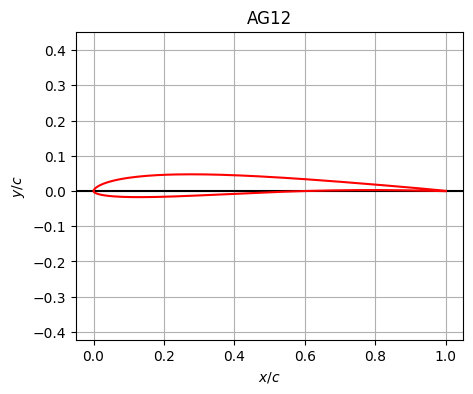

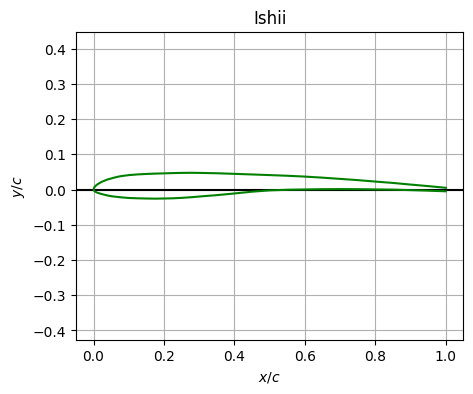

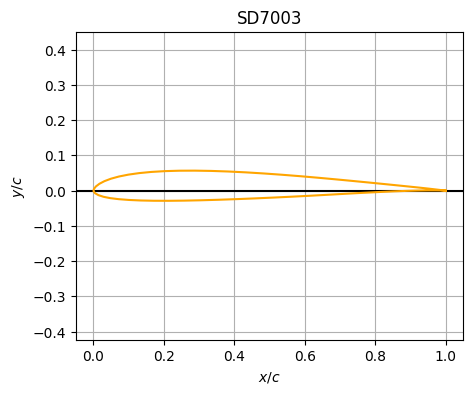

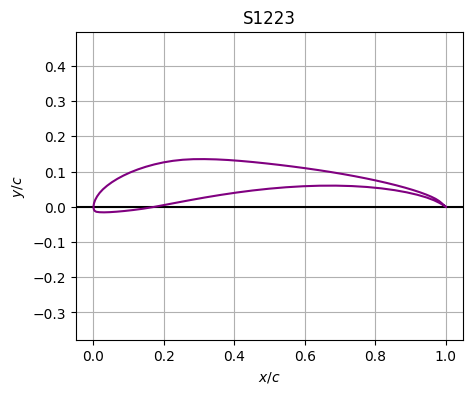

In [4]:
# Plotting the data

for colour, file_name in zip(['MediumTurquoise', 'red', 'green', 'orange', 'purple','Blue'], os.listdir(folder_path)):
    if file_name.endswith('.dat'):
        file_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(file_path)
        x = data[:, 0]  # x/c
        y = data[:, 1]  # y/c
        plt.figure(figsize=(5, 4))
        plt.axhline(0, color='black', lw=1.5)
        plt.plot(x, y, label=file_name.split('.')[0], color=colour)  # Use file name without extension as label
        plt.xlabel(r'$x/c$')
        plt.ylabel(r'$y/c$')
        plt.title(file_name.split('.')[0])
        plt.axis('equal')
        plt.grid()
        plt.show()

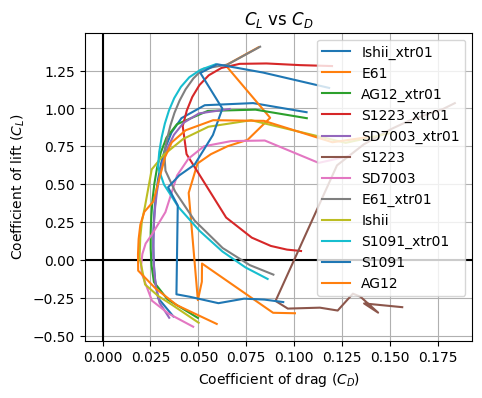

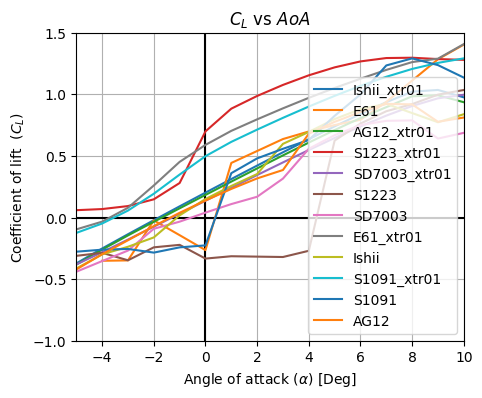

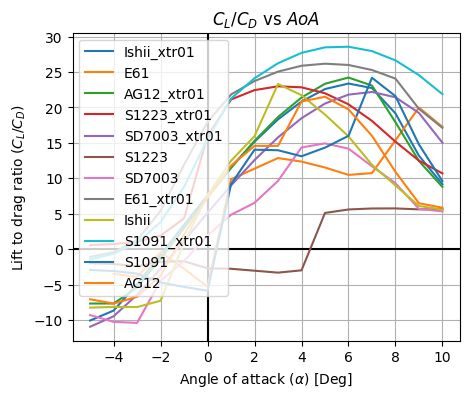

Maximum Cl/Cd for S1091_xtr01: 28.56455493183641
Alpha at which Cl/Cd is maximum for S1091_xtr01: 6.0 degrees
Cl at which Cl/Cd is maximum for S1091_xtr01: 1.0686
Cd at which Cl/Cd is maximum for S1091_xtr01: 0.03741


In [5]:
plt.figure(figsize=(5, 4))
plt.axhline(color = 'black',linewidth = 1.5)
plt.axvline(color = 'black',linewidth = 1.5)
for airfoil, data in results.items():
    plt.plot(data['cd'], data['cl'], label=airfoil)
plt.xlabel(r'Coefficient of drag $(C_D)$')
plt.ylabel(r'Coefficient of lift $(C_L)$')
plt.title(r'$C_L \text{ vs } C_D$')
plt.grid()
plt.legend()
plt.show()


#plot Cl vs alpha
plt.figure(figsize=(5, 4))
plt.axhline(color = 'black',linewidth = 1.5)
plt.vlines(0,-2,3,color = 'black',linewidth = 1.5)
for airfoil, data in results.items():
    plt.plot(data['alpha'], data['cl'], label=airfoil)
plt.xlim(-5,10)
plt.ylim(-1,1.5)
plt.title(r'$C_L \text{ vs } AoA$')
plt.ylabel(r"Coefficient of lift  $(C_L)$")
plt.xlabel(r"Angle of attack $(\alpha)$ [Deg]")
plt.grid()
plt.legend()
plt.show()

#plot Cl/Cd vs alpha
plt.figure(figsize=(5, 4))
plt.axhline(color = 'black',linewidth = 1.5)
plt.axvline(color = 'black',linewidth = 1.5)
for airfoil, data in results.items():
    plt.plot(data['alpha'], data['cl']/data['cd'], label=airfoil)
#plt.xlim(-5,10)
plt.title(r'$C_L/C_D \text{ vs } AoA$')
plt.ylabel(r"Lift to drag ratio $(C_L/C_D)$")
plt.xlabel(r"Angle of attack $(\alpha)$ [Deg]")
plt.grid()
plt.legend()
plt.show()

# I now want to find the alpha at which the Cl/Cd is maximum for S1091_xtr01
alpha = results['S1091_xtr01']['alpha']
cl = results['S1091_xtr01']['cl']
cd = results['S1091_xtr01']['cd']
cl_cd = cl/cd
max_index = np.argmax(cl_cd)
alpha_max = alpha[max_index]
cl_max = cl[max_index]
cd_max = cd[max_index]
print(f"Maximum Cl/Cd for S1091_xtr01: {cl_cd[max_index]}")
print(f"Alpha at which Cl/Cd is maximum for S1091_xtr01: {alpha_max} degrees")
print(f"Cl at which Cl/Cd is maximum for S1091_xtr01: {cl_max}")
print(f"Cd at which Cl/Cd is maximum for S1091_xtr01: {cd_max}")



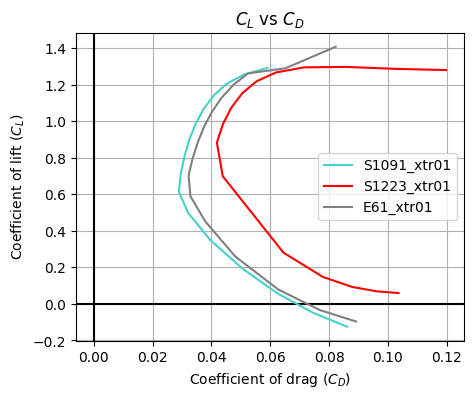

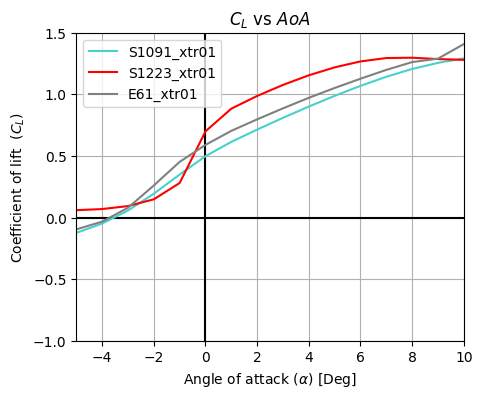

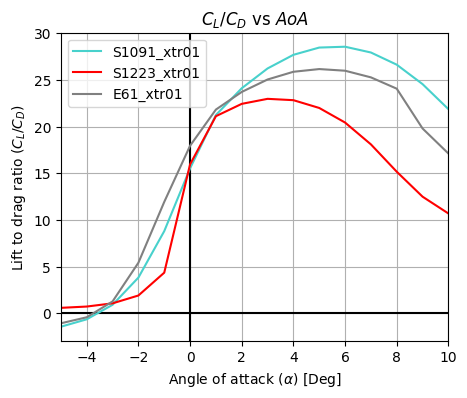

In [6]:
## CL vs CD

plt.figure(figsize=(5, 4))
plt.axhline(color = 'black',linewidth = 1.5)
plt.axvline(color = 'black',linewidth = 1.5)
plt.plot(results['S1091_xtr01']['cd'], results['S1091_xtr01']['cl'], label='S1091_xtr01', color='MediumTurquoise')
plt.plot(results['S1223_xtr01']['cd'], results['S1223_xtr01']['cl'], label='S1223_xtr01', color='red')
plt.plot(results['E61_xtr01']['cd'], results['E61_xtr01']['cl'], label='E61_xtr01', color='gray')
plt.xlabel(r'Coefficient of drag $(C_D)$')
plt.ylabel(r'Coefficient of lift $(C_L)$')
plt.title(r'$C_L \text{ vs } C_D$')
plt.grid()
plt.legend()
plt.show()

## CL vs Alpha
plt.figure(figsize=(5, 4))
plt.axhline(color = 'black',linewidth = 1.5)
plt.vlines(0,-2,3,color = 'black',linewidth = 1.5)
plt.plot(results['S1091_xtr01']['alpha'], results['S1091_xtr01']['cl'], label='S1091_xtr01', color='MediumTurquoise')
plt.plot(results['S1223_xtr01']['alpha'], results['S1223_xtr01']['cl'], label='S1223_xtr01', color='red')
plt.plot(results['E61_xtr01']['alpha'], results['E61_xtr01']['cl'], label='E61_xtr01', color='gray')
plt.xlim(-5,10)
plt.ylim(-1,1.5)
plt.title(r'$C_L \text{ vs } AoA$')
plt.ylabel(r"Coefficient of lift  $(C_L)$")
plt.xlabel(r"Angle of attack $(\alpha)$ [Deg]")
plt.grid()
plt.legend()
plt.show()

#plot Cl/Cd vs alpha
plt.figure(figsize=(5, 4))
plt.axhline(color = 'black',linewidth = 1.5)
plt.axvline(color = 'black',linewidth = 1.5)
plt.plot(results['S1091_xtr01']['alpha'], results['S1091_xtr01']['cl']/results['S1091_xtr01']['cd'], label='S1091_xtr01', color='MediumTurquoise')
plt.plot(results['S1223_xtr01']['alpha'], results['S1223_xtr01']['cl']/results['S1223_xtr01']['cd'], label='S1223_xtr01', color='red')
plt.plot(results['E61_xtr01']['alpha'], results['E61_xtr01']['cl']/results['E61_xtr01']['cd'], label='E61_xtr01', color='gray')
plt.xlim(-5,10)
plt.title(r'$C_L/C_D \text{ vs } AoA$')
plt.ylabel(r"Lift to drag ratio $(C_L/C_D)$")
plt.xlabel(r"Angle of attack $(\alpha)$ [Deg]")
plt.grid()
plt.legend()
plt.show()

